In [ ]:
#Instrucciones

In [1]:
#Durante las cuarentenas, una pregunta que se hizo el Ministerio de Transporte fue si las personas usaban más el auto, 
#o caminaban, y si los parques se visitaban más. Apple y Google sacaron los "mobility" reports, que tienen, a nivel de 
#region, la movilidad de la población.

#https://covid19.apple.com/mobility (Enlaces a un sitio externo.)

#https://www.google.com/covid19/mobility/ (Enlaces a un sitio externo.) 

#Su misión es tratar de contestar esas preguntas de más arriba, usando al menos un gráfico para cada una.

# Personas Caminar vs Conducir , Chile. 

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [46]:
Datos = pd.read_csv('C:/Users/srnik/OneDrive/Escritorio/Anlisis de datos/Tarea 3/applemobilitytrends-2021-12-09.csv')

C:\Users\srnik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
Datos

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71,197.18
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96,179.00
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29,168.30
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59,160.94


In [48]:
DatosGeo=Datos[Datos["geo_type"]=="country/region"]
DatosGeo.drop("alternative_name",axis=1,inplace=True) #Eliminar columna "alternative_name"
DatosGeo.drop("sub-region",axis=1,inplace=True) #Eliminar columna "sub-region"
DatosGeo.drop("country",axis=1,inplace=True) #Eliminar columna "country"
DatosGeo.drop("geo_type",axis=1,inplace=True) #Eliminar columna "geo_type"
DatosGeo

C:\Users\srnik\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,Albania,driving,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,Albania,walking,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,Argentina,driving,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,Argentina,walking,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,Australia,driving,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,United States,walking,100.0,99.59,101.87,100.60,121.36,132.38,100.10,94.79,...,142.73,151.78,158.66,205.96,232.39,145.03,143.51,146.44,150.56,160.56
149,Uruguay,driving,100.0,96.84,92.90,103.48,114.91,115.03,99.48,93.30,...,85.98,90.18,91.12,124.98,145.29,85.88,92.31,100.00,100.07,102.66
150,Uruguay,walking,100.0,94.90,78.04,100.46,105.04,98.78,76.52,89.94,...,98.29,102.14,102.63,125.87,131.05,67.79,100.52,122.10,111.20,112.91
151,Vietnam,driving,100.0,104.96,108.67,107.09,121.07,130.40,123.99,122.77,...,92.20,92.38,92.24,99.93,109.52,100.29,93.76,95.12,97.06,97.75


In [49]:
DatosCHL=DatosGeo[DatosGeo["region"]=="Chile"]
DatosCHL

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
22,Chile,driving,100.0,99.01,102.57,106.47,124.69,120.83,97.12,102.53,...,109.32,114.46,115.37,158.26,153.99,106.04,118.25,137.21,112.95,137.00
23,Chile,walking,100.0,102.58,103.13,103.74,107.87,86.73,59.44,99.53,...,116.08,123.24,122.84,151.82,132.18,79.77,129.48,144.41,95.62,144.52


In [50]:
Datosmelt=DatosCHL.melt(id_vars=["region","transportation_type"],var_name="fecha")
Datosmelt

,region,transportation_type,fecha,value
0,Chile,driving,2020-01-13,100.00
1,Chile,walking,2020-01-13,100.00
2,Chile,driving,2020-01-14,99.01
3,Chile,walking,2020-01-14,102.58
4,Chile,driving,2020-01-15,102.57
...,...,...,...,...
1389,Chile,walking,2021-12-07,144.41
1390,Chile,driving,2021-12-08,112.95
1391,Chile,walking,2021-12-08,95.62
1392,Chile,driving,2021-12-09,137.00


In [51]:
Datosmelt["fecha"]=pd.to_datetime(Datosmelt["fecha"])  #Convierte argumento fecha en Datatime

In [52]:
df = pd.DataFrame(Datosmelt["fecha"])
df['mes'] = pd.DatetimeIndex(df['fecha']).month
df['Medio de transporte'] = Datosmelt["transportation_type"]
df['Valores'] = Datosmelt["value"]

In [53]:
df

,fecha,mes,Medio de transporte,Valores
0,2020-01-13,1,driving,100.00
1,2020-01-13,1,walking,100.00
2,2020-01-14,1,driving,99.01
3,2020-01-14,1,walking,102.58
4,2020-01-15,1,driving,102.57
...,...,...,...,...
1389,2021-12-07,12,walking,144.41
1390,2021-12-08,12,driving,112.95
1391,2021-12-08,12,walking,95.62
1392,2021-12-09,12,driving,137.00


In [54]:
Walking=df[df["Medio de transporte"]=="walking"]

In [55]:
Driving=df[df["Medio de transporte"]=="driving"]

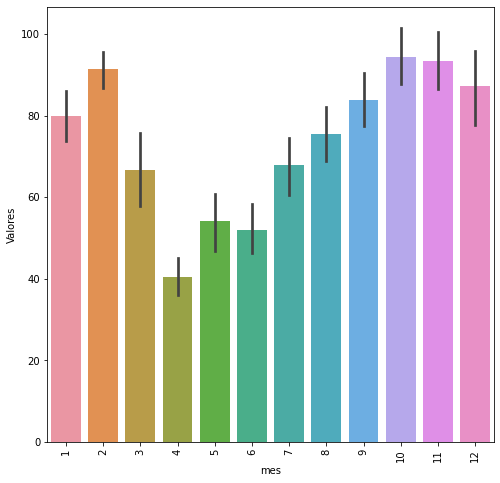

In [56]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
WalkingG = sns.barplot(x="mes", y="Valores",data=Walking)


<AxesSubplot:xlabel='mes', ylabel='Valores'>

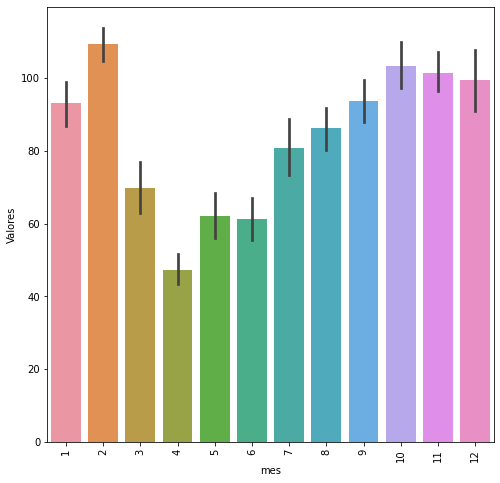

In [57]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
sns.barplot(x="mes", y="Valores",data=Driving)


In [66]:
## Comparando graficas walking y driving, nos podemos dar cuenta que en cuento al movimiento en el comienzo de la pandemia la poblacion chilena 
## usan más el transporte automotriz mas que la caminata 

# Movilidad en las plazas, Chile. 

In [67]:
DatosParques = pd.read_csv('C:/Users/srnik/OneDrive/Escritorio/Anlisis de datos/Tarea 3/2020_CL_Region_Mobility_Report.csv')

In [68]:
DatosParques

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22418,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-27,-80.0,-51.0,-81.0,-66.0,-31.0,20.0
22419,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-28,-33.0,-4.0,-47.0,-27.0,-19.0,10.0
22420,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-29,-35.0,0.0,-45.0,-25.0,-21.0,11.0
22421,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-30,-33.0,9.0,-38.0,-17.0,-19.0,11.0


In [70]:
DatosGeoP=DatosParques[DatosParques["country_region"]=="Chile"]
DatosGeoP.drop("residential_percent_change_from_baseline",axis=1,inplace=True) 
DatosGeoP.drop("workplaces_percent_change_from_baseline",axis=1,inplace=True) 
DatosGeoP.drop("transit_stations_percent_change_from_baseline",axis=1,inplace=True) 
DatosGeoP.drop("grocery_and_pharmacy_percent_change_from_baseline",axis=1,inplace=True)
DatosGeoP.drop("retail_and_recreation_percent_change_from_baseline",axis=1,inplace=True)
DatosGeoP.drop("place_id",axis=1,inplace=True)
DatosGeoP.drop("census_fips_code",axis=1,inplace=True)
DatosGeoP.drop("iso_3166_2_code",axis=1,inplace=True)
DatosGeoP.drop("metro_area",axis=1,inplace=True)
DatosGeoP.drop("sub_region_1",axis=1,inplace=True)
DatosGeoP.drop("sub_region_2",axis=1,inplace=True)
DatosGeoP.drop("country_region_code",axis=1,inplace=True)
DatosGeoP

,country_region,date,parks_percent_change_from_baseline
0,Chile,2020-02-15,9.0
1,Chile,2020-02-16,5.0
2,Chile,2020-02-17,11.0
3,Chile,2020-02-18,13.0
4,Chile,2020-02-19,11.0
...,...,...,...
22418,Chile,2020-12-27,-81.0
22419,Chile,2020-12-28,-47.0
22420,Chile,2020-12-29,-45.0
22421,Chile,2020-12-30,-38.0


In [73]:
DatosGeoP["date"]=pd.to_datetime(DatosGeoP["date"])  #Convierte argumento fecha en Datatime

In [78]:
dp = pd.DataFrame(DatosGeoP["date"])
dp['mes'] = pd.DatetimeIndex(dp['date']).month
dp['Valores visitas a parques'] = DatosGeoP["parks_percent_change_from_baseline"]
dp

,date,mes,Valores visitas a parques
0,2020-02-15,2,9.0
1,2020-02-16,2,5.0
2,2020-02-17,2,11.0
3,2020-02-18,2,13.0
4,2020-02-19,2,11.0
...,...,...,...
22418,2020-12-27,12,-81.0
22419,2020-12-28,12,-47.0
22420,2020-12-29,12,-45.0
22421,2020-12-30,12,-38.0


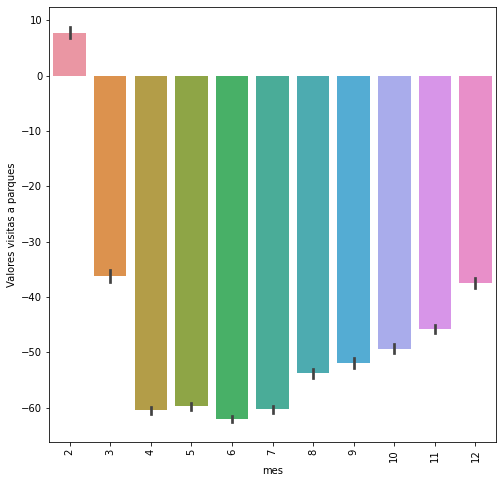

In [79]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
WalkingP = sns.barplot(x="mes", y="Valores visitas a parques",data=dp)

In [ ]:
#La movilización en los parques bajo en torno a la pandemia segun la grafica mostrada.